In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 1.线检测

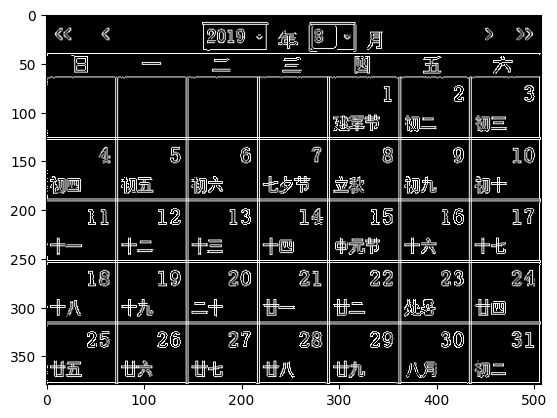

In [3]:
img = cv.imread('img/rili.jpg',0)
edges = cv.Canny(img, 50, 150)
plt.imshow(edges, cmap='gray')

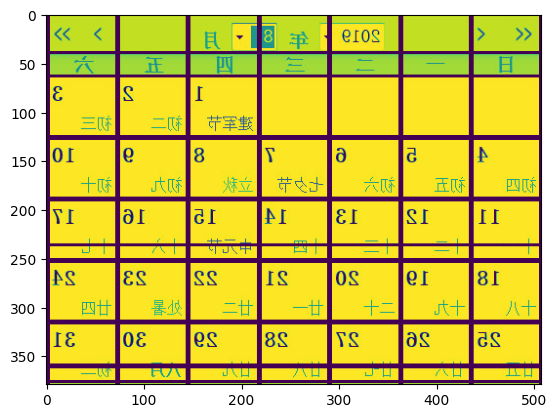

In [19]:
 # 霍夫检测线
 lines = cv.HoughLines(edges,0.8,np.pi/180,150)

 # 绘制线
 for line in lines:
     rho,theta = line[0] # rho:点到直线的最短距离，theta:法向量与x轴的夹角
     a = np.cos(theta)
     b = np.sin(theta)
     x0 = a*rho # x0 y0 法向量从原点出发，到达直线的垂足坐标
     y0 = b*rho
     x1 = int(x0 + 1000*(-b)) # x1 x2 为直线延长线上的两点
     y1 = int(y0 + 1000*(a))
     x2 = int(x0 - 1000*(-b))
     y2 = int(y0 - 1000*(a))
     cv.line(img,(x1,y1),(x2,y2),(0,0,255))
plt.imshow(img[:,::-1])

# 2. 圆检测

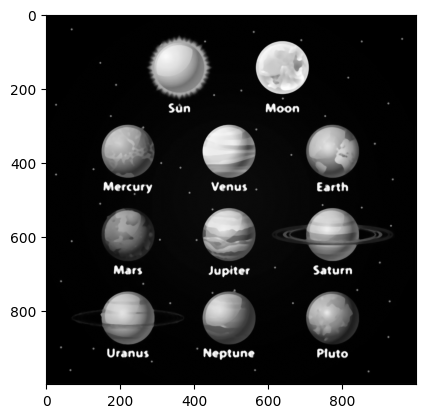

In [56]:
# 读取图片
star = cv.imread('img/star.jpeg')
gray_image = cv.cvtColor(star,cv.COLOR_BGR2GRAY)
img = cv.medianBlur(gray_image,7)
plt.imshow(img,cmap='gray')

In [1]:
# 检测
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,200,param1=100,param2=50,minRadius=0,maxRadius=100) # 注意：hough圆检测中包含了一个canny边缘检测
# 绘制
for i in circles[0,:]:
    center_x = int(i[0])
    center_y = int(i[1])
    radius = int(i[2])
    cv.circle(img,(center_x,center_y),radius,(255,255,255),200)
    cv.circle(img,(center_x,center_y),20,(0,255,0),-1)
# 展示
plt.imshow(star[:,:,::-1])

NameError: name 'cv' is not defined